<ipython-input-3-b83b5d0a546e>:43: RuntimeWarning: invalid value encountered in long_scalars
  normal_accuracy_rate = true_negatives / (true_negatives + false_positives)
<ipython-input-3-b83b5d0a546e>:44: RuntimeWarning: invalid value encountered in long_scalars
  anomaly_accuracy_rate = true_positives / (true_positives + false_negatives)


Normal Event Detection Accuracy Rate: nan%
Anomaly Event Detection Accuracy Rate: nan%


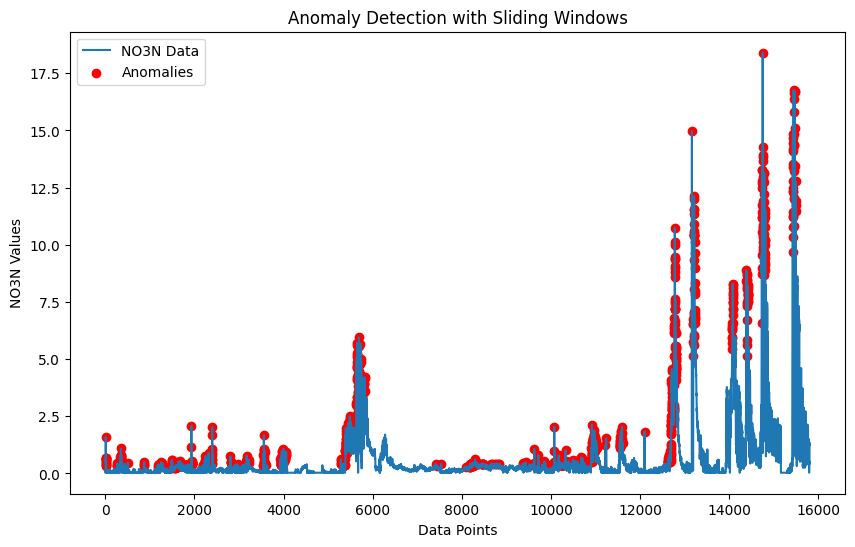

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/AG_NO3_fill_cells_remove_NAN.csv')
nitrate_values = data['NO3N'].values  # Assuming 'NO3N' is the column name for Nitrate

# Parameters
window_size = 1000
threshold_multiplier = 3  # You may adjust this multiplier based on your data

# Function to calculate percentiles and detect anomalies
def detect_anomalies(data, window_size, threshold_multiplier):
    anomalies = []
    thresholds = []

    for i in range(len(data) - window_size + 1):
        window_data = data[i : i + window_size]
        threshold = np.percentile(window_data, 95)  # You may adjust the percentile
        thresholds.append(threshold)

        if i == 0:
            anomalies.extend([1 if val > threshold else 0 for val in window_data])
        else:
            new_data_point = data[i + window_size - 1]
            anomalies.append(1 if new_data_point > threshold else 0)

    return anomalies, thresholds

# Detect anomalies and calculate accuracy rates
anomaly_labels, thresholds = detect_anomalies(nitrate_values, window_size, threshold_multiplier)

# Add the anomaly labels to the DataFrame
data['Anomaly_Label'] = anomaly_labels

# Calculate accuracy rates
true_positives = np.sum((anomaly_labels == 1) & (data['Student_Flag'] == 1))
true_negatives = np.sum((anomaly_labels == 0) & (data['Student_Flag'] == 0))
false_positives = np.sum((anomaly_labels == 1) & (data['Student_Flag'] == 0))
false_negatives = np.sum((anomaly_labels == 0) & (data['Student_Flag'] == 1))

normal_accuracy_rate = true_negatives / (true_negatives + false_positives)
anomaly_accuracy_rate = true_positives / (true_positives + false_negatives)

print(f"Normal Event Detection Accuracy Rate: {normal_accuracy_rate * 100:.2f}%")
print(f"Anomaly Event Detection Accuracy Rate: {anomaly_accuracy_rate * 100:.2f}%")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['NO3N'], label='NO3N Data')
plt.scatter(data[data['Anomaly_Label'] == 1].index, data[data['Anomaly_Label'] == 1]['NO3N'], color='red', label='Anomalies')
plt.xlabel('Data Points')
plt.ylabel('NO3N Values')
plt.legend()
plt.title('Anomaly Detection with Sliding Windows')
plt.show()
